## Baruch Data Science Challenge 2021
### Group 17 


## Libraries Used

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_regression

## Import Data - Test and Training Data

In [180]:
pd.options.mode.chained_assignment = None  # default='warn' 
df_test = pd.read_table('test.csv', sep = ",")

In [181]:
df_test.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'a

In [182]:
pd.options.mode.chained_assignment = None  # default='warn'
df_train = pd.read_table('train.csv', sep = ",")

In [183]:
df_train.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

## Data understanding


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [7]:
df_train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

In [8]:
df_train[df_train['avg_time_discharging_lag14'].isnull()]

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0         28647                    5.12                   41.11   
1         36175                   36.60                    5.16   
7          5491                   11.49                    7.10   
8         43953                   35.88                   46.05   
16        35863                   40.50                    4.98   
...         ...                     ...                     ...   
40470     24118                    5.66                    4.96   
40472      7747                    5.17                    5.05   
40481     22568                   37.23                    4.80   
40486      5769                    5.02                    5.04   
40492     42194                   47.52                   11.16   

       avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                        6.56                   25.39            0.086667   
1                        6.23                    6.96            0.136667   
7                       18.48                     NaN           -0.650000   
8                        5.43                    4.77            0.830000   
16                      51.18                   47.73           -0.053333   
...                       ...                     ...                 ...   
40470                    6.59                   50.35            0.296667   
40472                    4.79                    5.21           -0.170000   
40481                    5.16                   21.09           -0.063333   
40486                    5.03                   35.64           -0.056667   
40492                    4.55                   42.00           -0.023333   

       charging_rate_lag7  avg_time_discharging_lag1  \
0               -0.006667                       4.37   
1               -1.296667                      62.67   
7                0.063333                      18.21   
8               -2.486667                      47.08   
16              -0.360000                      77.55   
...                   ...                        ...   
40470           -0.426667                       4.62   
40472           -0.016667                       4.84   
40481           -0.043333                      54.13   
40486           -0.003333                       4.39   
40492            0.026667                      97.23   

       avg_time_discharging_lag2  avg_time_discharging_lag3  ...  \
0                          91.70                      15.70  ...   
1                           6.53                       6.16  ...   
7                          10.88                      23.40  ...   
8                          85.63                       6.50  ...   
16                          4.47                      91.32  ...   
...                          ...                        ...  ...   
40470                       4.71                       4.52  ...   
40472                       5.72                       3.50  ...   
40481                       3.27                       3.80  ...   
40486                       4.78                       4.33  ...   
40492                      15.69                       3.85  ...   

       number_times_restart  avg_volt_change_charging  \
0                  2.375000                377.080000   
1                  1.000000                350.517857   
7                  0.428571                345.727143   
8                  0.785714                330.151429   
16                 1.250000                312.263333   
...                     ...                       ...   
40470              3.769231                360.187692   
40472              1.000000                365.942500   
40481              6.666667                351.115000   
40486              1.357143                379.806429   
40492              1.000000                344.962500   

       avg_volt_change_discharging  avg_time_charging  avg_time_discharging  \
0                      

In [9]:
df_train[df_train['avg_time_discharging_lag14'].isnull()].value_counts('fail_7')

fail_7
0    5508
1    1160
dtype: int64

For training data, missing values are in 'charging_rate_lag6', 'charging_rate_lag7',  'discharging_rate_lag6', 'discharging_rate_lag7', 'discharging_rate_lag8', 
'avg_time_charging_lag5',
'avg_time_charging_lag6',
'avg_time_charging_lag7',
'avg_time_charging_lag8',
'avg_time_charging_lag9', 'avg_time_charging_lag10',
'avg_time_charging_lag11', 
'avg_time_charging_lag12',
'avg_time_charging_lag13',
'avg_time_charging_lag14',
'avg_time_discharging_lag5',
'avg_time_discharging_lag6',
'avg_time_discharging_lag7',
'avg_time_discharging_lag8',
'avg_time_discharging_lag9', 'avg_time_discharging_lag10',
'avg_time_discharging_lag11', 
'avg_time_discharging_lag12',
'avg_time_discharging_lag13',
'avg_time_discharging_lag14'

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     4500 non-null   int64  
 1   avg_time_charging_lag1       4500 non-null   float64
 2   avg_time_charging_lag2       4500 non-null   float64
 3   avg_time_charging_lag3       4500 non-null   float64
 4   avg_time_charging_lag7       4497 non-null   float64
 5   charging_rate_lag3           4500 non-null   float64
 6   charging_rate_lag7           4499 non-null   float64
 7   avg_time_discharging_lag1    4500 non-null   float64
 8   avg_time_discharging_lag2    4500 non-null   float64
 9   avg_time_discharging_lag3    4500 non-null   float64
 10  avg_time_discharging_lag7    4497 non-null   float64
 11  discharging_rate_lag3        4500 non-null   float64
 12  discharging_rate_lag7        4499 non-null   float64
 13  charge_cycle_time_

## Data polarity

In [11]:
df_train.describe()

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
count  40500.000000            40500.000000            40500.000000   
mean   27511.156593               16.274839               16.521473   
std    12992.647611               15.374342               15.425769   
min     5000.000000                1.510000                1.060000   
25%    16234.750000                4.910000                4.920000   
50%    27528.000000                5.770000                5.830000   
75%    38785.250000               30.100000               30.730000   
max    49999.000000               82.550000               98.890000   

       avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
count            40500.000000            40434.000000        40500.000000   
mean                16.277490               16.355088           -0.043389   
std                 15.305041               15.137390            0.776305   
min                  0.040000                1.070000          -76.946667   
25%                  4.900000                4.900000           -0.066667   
50%                  5.780000                5.780000            0.000000   
75%                 30.060000               29.600000            0.046667   
max                 81.000000               81.890000            9.556667   

       charging_rate_lag7  avg_time_discharging_lag1  \
count        40488.000000               40500.000000   
mean            -0.053017                  25.800928   
std              0.756558                  29.243961   
min            -42.130000                   0.520000   
25%             -0.100000                   4.200000   
50%             -0.003333                   5.860000   
75%              0.060000                  50.200000   
max             17.913333                 104.550000   

       avg_time_discharging_lag2  avg_time_discharging_lag3  ...  \
count               40500.000000               40500.000000  ...   
mean                   26.353566                  25.903624  ...   
std                    29.459305                  29.269789  ...   
min                     0.700000                   1.070000  ...   
25%                     4.210000                   4.200000  ...   
50%                     5.920000                   5.850000  ...   
75%                    51.212500                  50.300000  ...   
max                   110.560000                 108.170000  ...   

       dischargecycles  total_off_time  number_times_restart  \
count     40500.000000    40500.000000          40500.000000   
mean         84.859009       25.258990              2.154864   
std          15.507518       37.037053              2.223237   
min          14.416667        0.000000              0.090909   
25%          74.500000        3.565217              1.052632   
50%          84.875000       17.097619              1.470588   
75%          95.200000       37.000000              2.353416   
max         145.333333     2013.000000             38.000000   

       avg_volt_change_charging  avg_volt_change_discharging  \
count              40500.000000                 40500.000000   
mean                 351.421779                   348.207773   
std                   12.745409                    13.277782   
min                  304.050833                   298.250000   
25%                  342.770532                   339.267541   
50%                  351.109967                   347.911440   
75%                  359.687861                   356.837450   
max                  410.957692                   420.486000   

       avg_time_charging  avg_time_discharging  max_voltage_day    piececount  \
count       40500.000000          40500.000000     40500.000000  40500.000000   
mean           16.352522             26.081939      4159.266095     20.526154   
std             3.553653              6.813312        11.306765     16.461988   
min             4.890000              4.131111      4112.454545      1.000000   


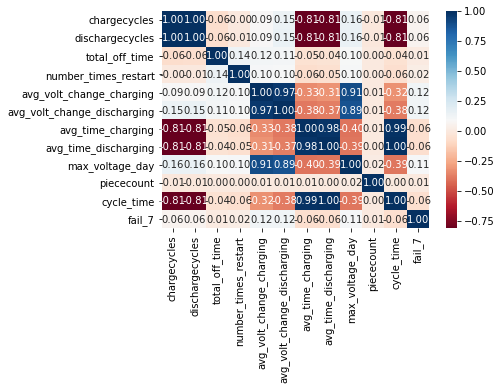

In [16]:
corr = df_train[['chargecycles','dischargecycles','total_off_time','number_times_restart','avg_volt_change_charging',
'avg_volt_change_discharging','avg_time_charging','avg_time_discharging','max_voltage_day',
'piececount','cycle_time','fail_7']].corr()
plt.autoscale()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
plt.show()

The above heatmap indicates the correlations of several attributes. We want to focus on attributes that describe features of the device. So certian attributes were selected. And dark blue/ dark red cells are the highly correlated attributes. 

(0.0, 250.0)

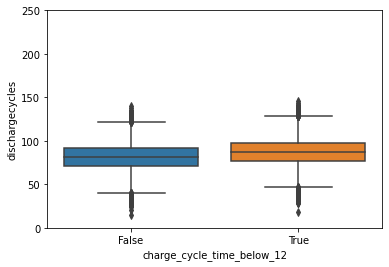

In [17]:
sns.boxplot(data = df_train, x = 'charge_cycle_time_below_12', y = 'dischargecycles')
plt.ylim((0, 250))

Discharge cycle time gets slightly longer when charge cycle time is less than 12.

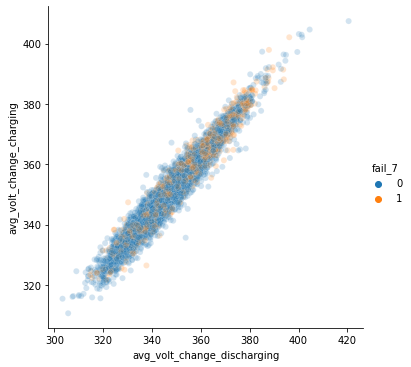

In [18]:
df_sample=df_train.sample(7000)
sns.relplot(x='avg_volt_change_discharging', y="avg_volt_change_charging",data=df_sample, kind='scatter', alpha = .2, hue="fail_7")
##noticed highest correlation between voltage variables and fail_7 so began with a few plots of that 

For this plot we noticed that both the 'avg_volt_change_charging' and 'avg_volt_change_discharging' had relatively high correlation values to the fail_7 column in the correlation matric so we decided to create a scatter plot. Unfortunately the data was alittle too dense to exract any meaningful insight so instead we plotted a sample of the data and noticed while relatively uniform it does seem that higher values in both axis correlate to a larger proportion of failed meters. 

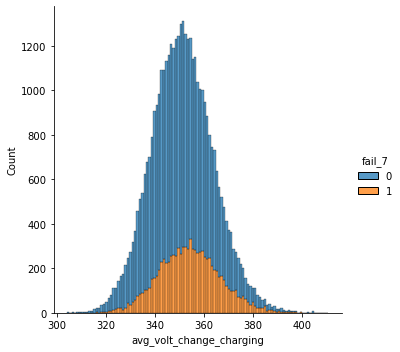

In [19]:
sns.displot(df_train, x='avg_volt_change_charging', hue='fail_7', multiple='stack')

##stacked bar graph to see distributions of avg volg charging across all meters broken up by fail_7

Here we produced a stacked distribution of avg voltage charging broken down by working and failed meters where both distributions follow normal distribution centered around 350 volts.


<Figure size 576x576 with 0 Axes>

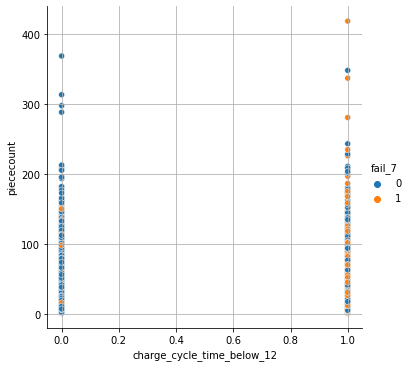

In [20]:
plt.figure(figsize=(8, 8))
sns.relplot(x='charge_cycle_time_below_12', y="piececount",data=df_train, kind='scatter', hue="fail_7")
plt.grid()
##compare the charge cycle time below twelve for meters that did or did not fail

<AxesSubplot:xlabel='charge_cycle_time_below_12', ylabel='count'>

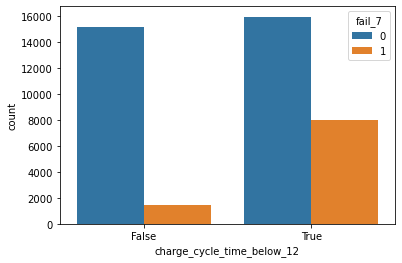

In [25]:
sns.countplot(x = df_train['charge_cycle_time_below_12'], hue = df_train['fail_7'])

The scatter plot and count plot above show that, for devices that have charge cycles below 12, it is more likely to fail in 7 days. 

# Data Preparation


In [184]:
df_train['fail_7'] = df_train['fail_7'].astype('category')
df_train['charge_cycle_time_below_12'] = pd.get_dummies(df_train['charge_cycle_time_below_12'],prefix_sep='_',drop_first=True)
df_train['charge_cycle_time_below_12'] = df_train['charge_cycle_time_below_12'].astype('category')

In [185]:
for i in df_train.columns:
    print(i, df_train[i].isnull().sum())

deviceid 0
avg_time_charging_lag1 0
avg_time_charging_lag2 0
avg_time_charging_lag3 0
avg_time_charging_lag7 66
charging_rate_lag3 0
charging_rate_lag7 12
avg_time_discharging_lag1 0
avg_time_discharging_lag2 0
avg_time_discharging_lag3 0
avg_time_discharging_lag7 66
discharging_rate_lag3 0
discharging_rate_lag7 12
fail_7 0
charge_cycle_time_below_12 0
avg_time_charging_lag4 0
avg_time_discharging_lag4 0
avg_time_charging_lag5 7
avg_time_discharging_lag5 7
avg_time_charging_lag6 28
avg_time_discharging_lag6 28
avg_time_charging_lag8 162
avg_time_discharging_lag8 162
avg_time_charging_lag9 374
avg_time_discharging_lag9 374
avg_time_charging_lag10 797
avg_time_discharging_lag10 797
avg_time_charging_lag11 1586
avg_time_discharging_lag11 1586
avg_time_charging_lag12 2757
avg_time_discharging_lag12 2757
avg_time_charging_lag13 4382
avg_time_discharging_lag13 4382
avg_time_charging_lag14 6668
avg_time_discharging_lag14 6668
discharging_rate_lag4 0
discharging_rate_lag5 0
discharging_rate_la

#### Dropping the null values and saving the modified DataFrame as 'train'

In [186]:
#Drop null values and save the modified DataFrame as 'train'
train = df_train.dropna(subset=['avg_time_discharging_lag14'], how='all')

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33832 entries, 2 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   deviceid                     33832 non-null  int64   
 1   avg_time_charging_lag1       33832 non-null  float64 
 2   avg_time_charging_lag2       33832 non-null  float64 
 3   avg_time_charging_lag3       33832 non-null  float64 
 4   avg_time_charging_lag7       33832 non-null  float64 
 5   charging_rate_lag3           33832 non-null  float64 
 6   charging_rate_lag7           33832 non-null  float64 
 7   avg_time_discharging_lag1    33832 non-null  float64 
 8   avg_time_discharging_lag2    33832 non-null  float64 
 9   avg_time_discharging_lag3    33832 non-null  float64 
 10  avg_time_discharging_lag7    33832 non-null  float64 
 11  discharging_rate_lag3        33832 non-null  float64 
 12  discharging_rate_lag7        33832 non-null  float64 
 13  f

In [188]:
train.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [189]:
predictors = ['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time', 'LastRecord', 'Date Deployed']
outcome = 'fail_7' #target

#### Defining X and y to get our X set and y set

In [190]:
X = train[predictors]
y = train['fail_7'].values

In [191]:
X.dtypes

avg_time_charging_lag1          float64
avg_time_charging_lag2          float64
avg_time_charging_lag3          float64
avg_time_charging_lag7          float64
charging_rate_lag3              float64
charging_rate_lag7              float64
avg_time_discharging_lag1       float64
avg_time_discharging_lag2       float64
avg_time_discharging_lag3       float64
avg_time_discharging_lag7       float64
discharging_rate_lag3           float64
discharging_rate_lag7           float64
charge_cycle_time_below_12     category
avg_time_charging_lag4          float64
avg_time_discharging_lag4       float64
avg_time_charging_lag5          float64
avg_time_discharging_lag5       float64
avg_time_charging_lag6          float64
avg_time_discharging_lag6       float64
avg_time_charging_lag8          float64
avg_time_discharging_lag8       float64
avg_time_charging_lag9          float64
avg_time_discharging_lag9       float64
avg_time_charging_lag10         float64
avg_time_discharging_lag10      float64


#### Subtracting the column 'Last Record' from the column 'Date Deployed' in order to get the total number of days in use.

In [192]:
fdate = X['Date Deployed'] = pd.to_datetime(X['Date Deployed'])
ldate = X['LastRecord'] = pd.to_datetime(X['LastRecord'])
X['Days_in_Service'] = (ldate - fdate)
X['Total_Days_in_Service'] = X['Days_in_Service'] / np.timedelta64(1, 'D')
X.head()

avg_time_charging_lag1  avg_time_charging_lag2  avg_time_charging_lag3  \
2                    5.51                    5.04                    4.52   
3                    4.66                   39.85                   35.76   
4                    5.10                   43.24                    4.63   
5                   27.74                    5.12                   42.39   
6                    4.67                    5.32                   23.99   

   avg_time_charging_lag7  charging_rate_lag3  charging_rate_lag7  \
2                    5.96           -0.460000           -0.083333   
3                   40.69            0.076667           -0.006667   
4                    5.26            0.040000           -0.153333   
5                    5.46            0.076667           -0.020000   
6                    4.62            0.270000           -0.010000   

   avg_time_discharging_lag1  avg_time_discharging_lag2  \
2                       5.13                       5.65   
3                       3.93                      76.37   
4                       4.69                      71.44   
5                      45.90                       3.99   
6                       3.56                       4.62   

   avg_time_discharging_lag3  avg_time_discharging_lag7  ...  \
2                       4.14                      14.02  ...   
3                      60.86                      73.53  ...   
4                       3.80                       6.29  ...   
5                      75.64                       4.36  ...   
6                      18.57                       3.74  ...   

   avg_volt_change_discharging  avg_time_charging avg_time_discharging  \
2                   343.409524          13.675238            20.471429   
3                   349.844737          16.306842            26.189474   
4                   367.730000          18.797333            30.812000   
5                   346.747500          12.878500            19.621000   
6                   353.025652          17.384783            27.495217   

   max_voltage_day  piececount  cycle_time  LastRecord  Date Deployed  \
2      4152.238095   19.200000   34.146667  2021-04-01     2019-10-31   
3      4164.631579   23.625000   42.496316  2021-04-01     2019-10-01   
4      4169.800000   12.666667   49.609333  2021-04-01     2019-09-13   
5      4151.600000    6.375000   32.499500  2021-04-01     2019-10-05   
6      4170.652174   20.500000   44.880000  2021-04-01     2019-09-13   

   Days_in_Service  Total_Days_in_Service  
2         518 days                  518.0  
3         548 days                  548.0  
4         566 days                  566.0  
5         544 days                  544.0  
6         566 days                  566.0  

[5 rows x 55 columns]

#### Dropping the columns 'Last Record', 'Date Deployed', and 'Days_in_Service' now that we have total number of days in use.

In [193]:
X_new = X.drop(['LastRecord', 'Date Deployed', 'Days_in_Service'], axis = 1)

#### Splitting the training data into training set and test set 

In [194]:
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X_train.head()

Train set: (27065, 52) (27065,)
Test set: (6767, 52) (6767,)


avg_time_charging_lag1  avg_time_charging_lag2  avg_time_charging_lag3  \
11164                    6.10                    4.96                    5.86   
34238                   26.36                    4.90                   43.73   
34127                   33.24                    6.55                    6.20   
5187                     5.03                    4.40                    4.53   
35759                   31.69                   28.22                   32.12   

       avg_time_charging_lag7  charging_rate_lag3  charging_rate_lag7  \
11164                   29.79            0.016667           -0.016667   
34238                    4.92           -0.130000           -0.030000   
34127                   17.54           -0.036667           -0.030000   
5187                     4.65            5.750000            0.040000   
35759                   50.72           -0.686667            0.396667   

       avg_time_discharging_lag1  avg_time_discharging_lag2  \
11164                       5.64                       3.34   
34238                      59.50                       4.71   
34127                      60.90                       5.64   
5187                        3.55                       4.20   
35759                      70.03                      44.78   

       avg_time_discharging_lag3  avg_time_discharging_lag7  ...  \
11164                       6.13                      43.38  ...   
34238                      77.05                       3.40  ...   
34127                       5.77                      31.37  ...   
5187                        4.04                       4.79  ...   
35759                      55.00                      74.17  ...   

       total_off_time  number_times_restart avg_volt_change_charging  \
11164        9.300000              0.900000               345.797500   
34238       38.055556              3.500000               363.081111   
34127        0.000000              0.764706               341.968235   
5187        48.727273              1.636364               358.841364   
35759        0.944444              2.388889               347.718889   

       avg_volt_change_discharging  avg_time_charging  avg_time_discharging  \
11164                   340.061000          16.057500             26.276500   
34238                   359.713889          17.792222             30.001111   
34127                   343.261765          19.208235             29.970000   
5187                    355.750909          17.415000             27.419091   
35759                   348.037778          24.326111             41.377778   

       max_voltage_day  piececount  cycle_time  Total_Days_in_Service  
11164      4153.300000   16.461538   42.334000                  526.0  
34238      4165.277778   16.666667   47.793333                  506.0  
34127      4148.294118   18.461538   49.178235                  547.0  
5187       4162.363636   19.727273   44.834091                  556.0  
35759      4151.166667    8.700000   65.703889                  555.0  

[5 rows x 52 columns]

In [195]:
y

[0, 0, 0, 0, 0, ..., 1, 1, 1, 0, 1]
Length: 33832
Categories (2, int64): [0, 1]

In [196]:
y_train

[1, 0, 0, 0, 0, ..., 0, 1, 0, 0, 0]
Length: 27065
Categories (2, int64): [0, 1]

In [197]:
y_test

[0, 0, 0, 0, 0, ..., 0, 0, 0, 1, 0]
Length: 6767
Categories (2, int64): [0, 1]

# Normalization

#### Normalizing both the X training and test set using the standard scale of (0, 1).

In [198]:
scale = MinMaxScaler()
X_train_norm = pd.DataFrame(scale.fit_transform(X_train), columns = X_train.columns)
X_train_norm.head()
X_test_norm = pd.DataFrame(scale.fit_transform(X_test), columns = X_test.columns)
X_test_norm.head()

avg_time_charging_lag1  avg_time_charging_lag2  avg_time_charging_lag3  \
0                0.862456                0.045214                0.037386   
1                0.493802                0.477242                0.037518   
2                0.254132                0.663844                0.052632   
3                0.041617                0.052926                0.043219   
4                0.029368                0.049297                0.696540   

   avg_time_charging_lag7  charging_rate_lag3  charging_rate_lag7  \
0                0.139139            0.526446            0.426991   
1                0.073662            0.511361            0.432153   
2                0.064672            0.510980            0.423304   
3                0.649805            0.505633            0.424484   
4                0.054206            0.550315            0.409440   

   avg_time_discharging_lag1  avg_time_discharging_lag2  \
0                   0.769656                   0.016634   
1                   0.733254                   0.658218   
2                   0.418763                   0.802079   
3                   0.034428                   0.033960   
4                   0.016080                   0.014752   

   avg_time_discharging_lag3  avg_time_discharging_lag7  ...  total_off_time  \
0                   0.021111                   0.186012  ...        0.000899   
1                   0.021679                   0.038557  ...        0.000472   
2                   0.038531                   0.025705  ...        0.008544   
3                   0.015810                   0.837202  ...        0.008769   
4                   0.677364                   0.014546  ...        0.027372   

   number_times_restart  avg_volt_change_charging  \
0              0.010836                  0.586530   
1              0.035897                  0.357301   
2              0.027400                  0.342636   
3              0.020708                  0.386104   
4              0.049391                  0.237242   

   avg_volt_change_discharging  avg_time_charging  avg_time_discharging  \
0                     0.559203           0.323887              0.325787   
1                     0.348601           0.278693              0.301619   
2                     0.350976           0.574150              0.616481   
3                     0.354482           0.491393              0.487054   
4                     0.150623           0.785176              0.783104   

   max_voltage_day  piececount  cycle_time  Total_Days_in_Service  
0         0.522172    0.107999    0.330616               0.827815  
1         0.414353    0.036622    0.298280               0.761589  
2         0.285428    0.036584    0.613927               0.629139  
3         0.349077    0.078606    0.498110               0.655629  
4         0.238493    0.043011    0.800652               0.688742  

[5 rows x 52 columns]

In [199]:
X_train_norm.shape

(27065, 52)

In [200]:
X_test_norm.shape

(6767, 52)

#### Changing the column 'charge_cycle_time_below_12' to binary values, False = 0, True = 1.

In [201]:
X_train['charge_cycle_time_below_12'] = X_train['charge_cycle_time_below_12'].astype(float)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27065 entries, 11164 to 20994
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_time_charging_lag1       27065 non-null  float64
 1   avg_time_charging_lag2       27065 non-null  float64
 2   avg_time_charging_lag3       27065 non-null  float64
 3   avg_time_charging_lag7       27065 non-null  float64
 4   charging_rate_lag3           27065 non-null  float64
 5   charging_rate_lag7           27065 non-null  float64
 6   avg_time_discharging_lag1    27065 non-null  float64
 7   avg_time_discharging_lag2    27065 non-null  float64
 8   avg_time_discharging_lag3    27065 non-null  float64
 9   avg_time_discharging_lag7    27065 non-null  float64
 10  discharging_rate_lag3        27065 non-null  float64
 11  discharging_rate_lag7        27065 non-null  float64
 12  charge_cycle_time_below_12   27065 non-null  float64
 13  avg_time_cha

# Principal Component Analysis
Specified that we wanted 95% of the variance to be retained, then turning it into an array and printing the total number of components.

In [202]:
pca = PCA(.95)
pca.fit(X_train_norm)
x_95 = pca.transform(X_train_norm)
print(pca.n_components_)

16


We get a total number of 16 components while retaining 95% of the variance. We then look at the explained variance ratio for the pca and plot the ratio.

[12.83605767  8.84521127  6.68081894  6.62116244  6.27157924  6.13443201
  6.04065423  5.75874422  5.47981291  5.35947622  5.23468686  5.12552771
  5.04228779  4.78331713  4.59029803  1.95020795]


Text(0, 0.5, 'Explained variance')

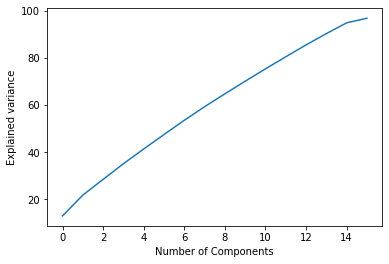

In [203]:
#explained variance for each principal component
e_var = pca.explained_variance_ratio_*100
print(e_var)

#plotting explained variance ratio for 95%
plt.plot(np.cumsum(e_var))
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')

Create a new dataset with the 16 principal components to be used when training our models.

In [206]:
pca_train = pd.DataFrame(x_95, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 
                                          'PC15', 'PC16'])
pca_train.shape

(27065, 16)

Transforming X test test with the components we found using X train.

In [208]:
X_test_transformed = pca.transform(X_test_norm)
pca_test = pd.DataFrame(X_test_transformed, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 
                                          'PC15', 'PC16'])
pca_test.shape

(6767, 16)

# Linear Discriminant Analysis (with One Linear Discriminant)

In [48]:
lda = LDA(n_components=1)
lda_X_train_norm = lda.fit_transform(X_train_norm, y_train)
lda_X_test_norm = lda.transform(X_test_norm)


classifier = RandomForestClassifier(max_depth = 2, random_state = 0)

classifier.fit(X_train_norm, y_train)
y_pred = classifier.predict(X_test_norm)

#### Evaluating the analysis with one linear discriminant, which gives us 76% accuracy. PCA appears to be better in this instance.

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[5149    0]
 [1618    0]]
Accuracy 0.7608984779074922


### We now have two different datasets to run models on: 
pca_train : pca for 95% of variance, 16 components \
X_train_norm : full X train set, normalized

### Can evaluate our models using:
X_test_transformed : X_test set transformed with the 16 components from pca \
X_test_norm : X test set, normalized

# Modeling

### KNN

#### KNN Model with Normalized Dataset

In [54]:
#Using accuracy_score to get the best K
K = 10
mean_acc = np.zeros((K-1)) #Return a new array of given shape and type, filled with zeros.
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm, y_train)
    yhat = neigh.predict(X_test_norm)
    #jaccard_similarity_score function.
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66100192, 0.73237772, 0.70503916, 0.73887986, 0.72336338,
       0.74405202, 0.73016108, 0.74774642, 0.73282104])

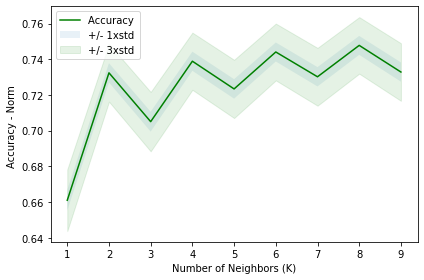

In [55]:
#Plot model accuracy for different number of neighbors
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy - Norm ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.747746416432688 with k = 8


In [57]:
#Fit KNN model with K=8
neigh_8 = KNeighborsClassifier(n_neighbors=8).fit(X_train_norm,y_train)
yhat_8 = neigh_8.predict(X_test_norm)

In [58]:
#Evaluate KNN model
print("Accuracy:",accuracy_score(y_test, yhat_8))
print("precision score: ", precision_score(y_test,yhat_8))
print("recall score: ", recall_score(y_test,yhat_8))
print("f1-score: ", f1_score(y_test,yhat_8))

Accuracy: 0.747746416432688
precision score:  0.4
recall score:  0.1100123609394314
f1-score:  0.172564226854096


#### KNN Model with PCA

In [59]:
# Trian model to get the best K value
Ks = 10
mean_acc = np.zeros((Ks-1)) #Return a new array of given shape and type, filled with zeros.
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(pca_train, y_train)
    yhat = neigh.predict(X_test_transformed)
    #jaccard_similarity_score function.
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66247968, 0.73282104, 0.70016255, 0.73843653, 0.71863455,
       0.74213093, 0.72454559, 0.74449535, 0.73075218])

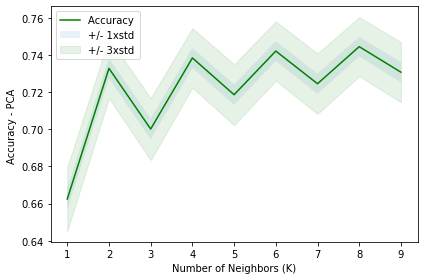

In [60]:
#Plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy - PCA ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [61]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.7444953450568937 with k = 8


In [62]:
# Fit KNN model with K = 8
neigh_pca = KNeighborsClassifier(n_neighbors=2).fit(pca_train,y_train)
yhat_pca = neigh_pca.predict(pca_test)

In [63]:
# Evaluation of KNN model with k = 8
print("Accuracy:",accuracy_score(y_test, yhat_pca))
print("precision score: ", precision_score(y_test,yhat_pca))
print("recall score: ", recall_score(y_test,yhat_pca))
print("f1-score: ", f1_score(y_test,yhat_pca))

Accuracy: 0.7328210432983597
precision score:  0.33035714285714285
recall score:  0.11433868974042027
f1-score:  0.16988062442607899


### Decision Tree


#### Decision Tree with Normalized Dataset

In [138]:
##regression tree with regular normalized variables 
dt_norm = DecisionTreeClassifier(max_depth = 4)
dt_norm.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=4)

In [139]:
dt_norm_importances = dt_norm.feature_importances_
dt_norm_df = pd.DataFrame({'feature': X_train_norm.columns, 'importance': dt_norm_importances})
dt_norm_df = dt_norm_df.sort_values('importance', ascending = False)
print(dt_norm_df)

                        feature  importance
12   charge_cycle_time_below_12    0.452170
10        discharging_rate_lag3    0.400393
4            charging_rate_lag3    0.114280
44     avg_volt_change_charging    0.019759
43         number_times_restart    0.004972
42               total_off_time    0.002825
0        avg_time_charging_lag1    0.002424
11        discharging_rate_lag7    0.002176
33        discharging_rate_lag4    0.001002
46            avg_time_charging    0.000000
38           charging_rate_lag5    0.000000
30   avg_time_discharging_lag13    0.000000
31      avg_time_charging_lag14    0.000000
32   avg_time_discharging_lag14    0.000000
34        discharging_rate_lag5    0.000000
35        discharging_rate_lag6    0.000000
36        discharging_rate_lag8    0.000000
37           charging_rate_lag4    0.000000
39           charging_rate_lag6    0.000000
45  avg_volt_change_discharging    0.000000
40                 chargecycles    0.000000
41              dischargecycles 

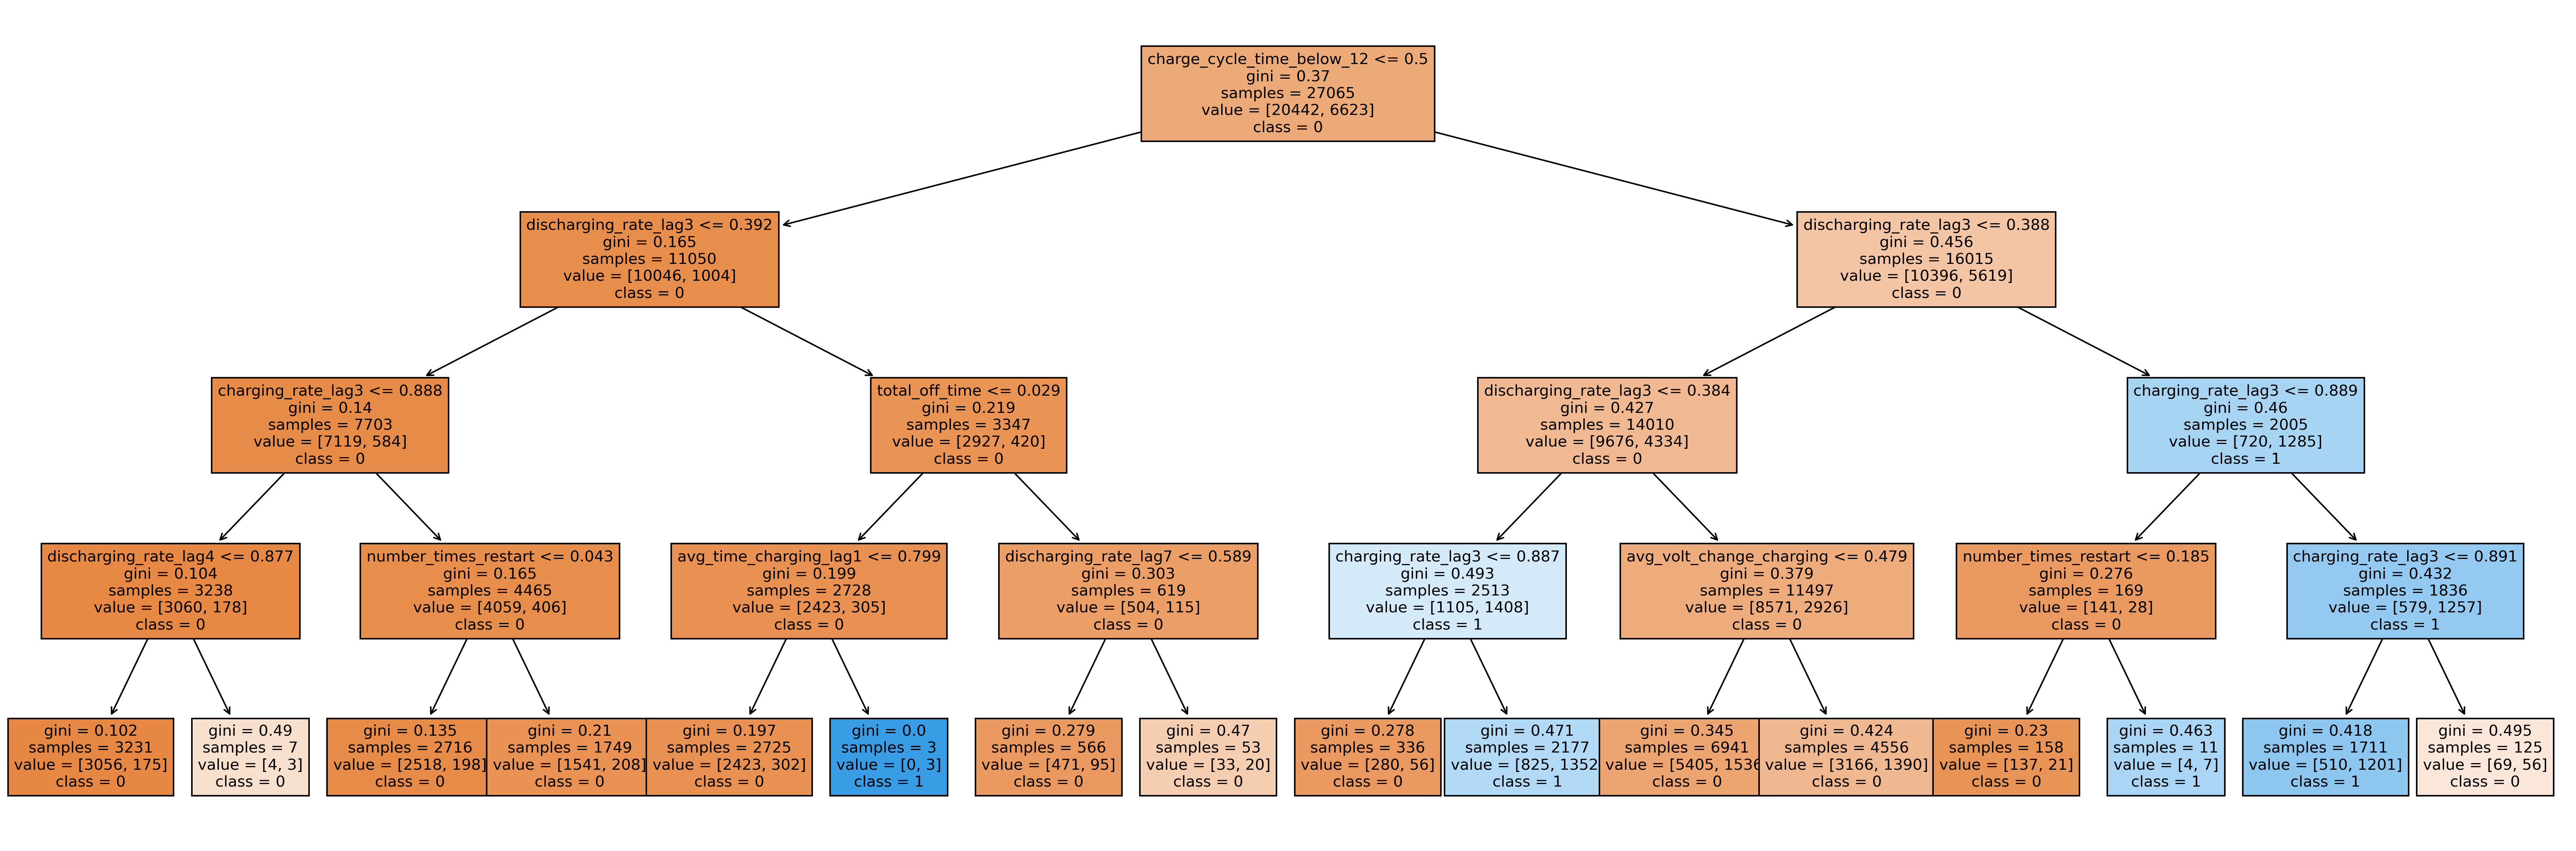

In [140]:
fn = X_train_norm.columns
cn = ['0', '1']

fig, ax = plt.subplots(figsize = (30, 10), dpi = 300)
tree.plot_tree(dt_norm, feature_names = fn, class_names = cn, filled = True, fontsize = 10)
plt.show()

In [148]:
print("Accuracy:",accuracy_score(y_test, dt_norm.predict(X_test_norm)))
print("precision score: ", precision_score(y_test,dt_norm.predict(X_test_norm)))
print("recall score: ", recall_score(y_test,dt_norm.predict(X_test_norm)))
print("f1-score: ", f1_score(y_test,dt_norm.predict(X_test_norm)))

Accuracy: 0.7543963351559037
precision score:  0.375
recall score:  0.0407911001236094
f1-score:  0.07357859531772576


In [149]:
X_train_norm_select = X_train_norm[['charge_cycle_time_below_12', 'discharging_rate_lag3', 'charging_rate_lag3', 'avg_volt_change_charging', 'number_times_restart', 'total_off_time','avg_time_charging_lag1', 'discharging_rate_lag7', 'discharging_rate_lag4']]
X_test_norm_select = X_test_norm[['charge_cycle_time_below_12', 'discharging_rate_lag3', 'charging_rate_lag3', 'avg_volt_change_charging', 'number_times_restart', 'total_off_time','avg_time_charging_lag1', 'discharging_rate_lag7', 'discharging_rate_lag4']]
dt_norm_select = DecisionTreeClassifier(max_depth = 4)
dt_norm_select.fit(X_train_norm_select, y_train)

DecisionTreeClassifier(max_depth=4)

In [150]:
X_train_norm_select

charge_cycle_time_below_12  discharging_rate_lag3  charging_rate_lag3  \
0                             1.0               0.385701            0.889715   
1                             0.0               0.454785            0.888020   
2                             0.0               0.385414            0.889099   
3                             0.0               0.384898            0.955994   
4                             0.0               0.385988            0.881585   
...                           ...                    ...                 ...   
27060                         0.0               0.389087            0.907634   
27061                         1.0               0.385759            0.889561   
27062                         1.0               0.385586            0.889600   
27063                         1.0               0.387308            0.887211   
27064                         1.0               0.386964            0.889253   

       avg_volt_change_charging  number_times_restart  total_off_time  \
0                      0.397579              0.017491        0.006238   
1                      0.572135              0.092551        0.025527   
2                      0.358905              0.013585        0.000000   
3                      0.529315              0.038749        0.032686   
4                      0.416984              0.060474        0.000634   
...                         ...                   ...             ...   
27060                  0.609559              0.068493        0.029023   
27061                  0.524831              0.231247        0.146902   
27062                  0.419768              0.037033        0.008462   
27063                  0.401254              0.030001        0.004600   
27064                  0.442055              0.020378        0.001073   

       avg_time_charging_lag1  discharging_rate_lag7  discharging_rate_lag4  
0                    0.056639               0.559811               0.782318  
1                    0.306639               0.559711               0.728252  
2                    0.391535               0.552492               0.780058  
3                    0.043435               0.562318               0.782805  
4                    0.372409               0.532438               0.782140  
...                       ...                    ...                    ...  
27060                0.060464               0.549584               0.716331  
27061                0.504812               0.485310               0.777975  
27062                0.043929               0.559912               0.782185  
27063                0.590819               0.602727               0.770352  
27064                0.038500               0.601524               0.783957  

[27065 rows x 9 columns]

In [151]:
dt_norm_importances_select = dt_norm_select.feature_importances_
dt_norm_df_select = pd.DataFrame({'feature': X_train_norm_select.columns, 'importance': dt_norm_importances_select})
dt_norm_df_select = dt_norm_df_select.sort_values('importance', ascending = False)
print(dt_norm_df_select)

                      feature  importance
0  charge_cycle_time_below_12    0.452170
1       discharging_rate_lag3    0.400393
2          charging_rate_lag3    0.114280
3    avg_volt_change_charging    0.019759
4        number_times_restart    0.004972
5              total_off_time    0.002825
6      avg_time_charging_lag1    0.002424
7       discharging_rate_lag7    0.002176
8       discharging_rate_lag4    0.001002


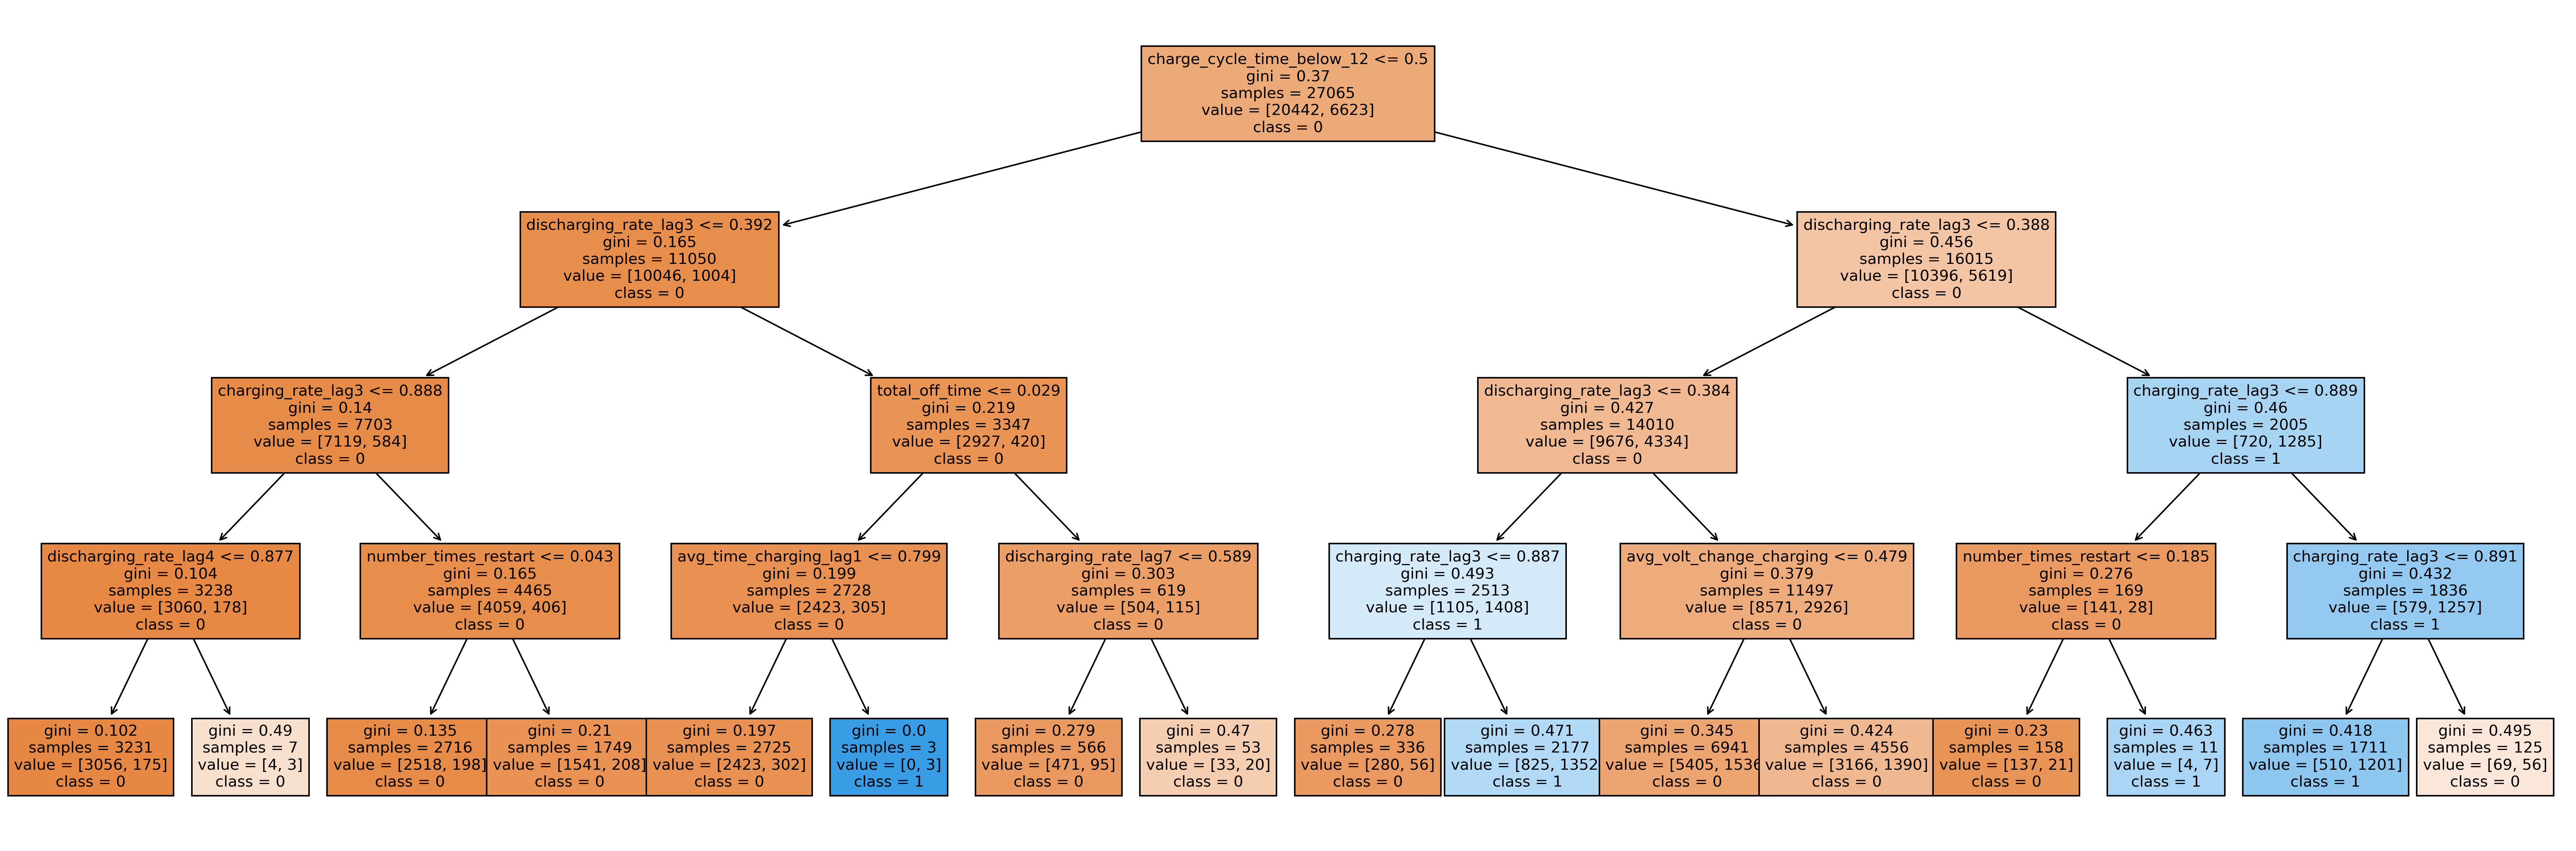

In [152]:
fn = X_train_norm_select.columns
cn = ['0', '1']

fig, ax = plt.subplots(figsize = (30, 10), dpi = 300)
tree.plot_tree(dt_norm_select, feature_names = fn, class_names = cn, filled = True, fontsize = 10)
plt.show()

In [153]:
print("Accuracy:",accuracy_score(y_test, dt_norm_select.predict(X_test_norm_select)))
print("precision score: ", precision_score(y_test,dt_norm_select.predict(X_test_norm_select)))
print("recall score: ", recall_score(y_test,dt_norm_select.predict(X_test_norm_select)))
print("f1-score: ", f1_score(y_test,dt_norm_select.predict(X_test_norm_select)))

Accuracy: 0.7543963351559037
precision score:  0.375
recall score:  0.0407911001236094
f1-score:  0.07357859531772576


### Decision Tree with PCA

In [154]:
dt_pca = DecisionTreeClassifier(max_depth = 4)
dt_pca.fit(pca_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [155]:
dt_pca_importances = dt_pca.feature_importances_
dt_pca_df = pd.DataFrame({'feature': pca_train.columns, 'importance': dt_pca_importances})
dt_pca_df = dt_pca_df.sort_values('importance', ascending = False)
print(dt_pca_df)

   feature  importance
0      PC1    0.833184
15    PC16    0.140189
6      PC7    0.004854
1      PC2    0.004739
12    PC13    0.004455
2      PC3    0.004274
9     PC10    0.004141
11    PC12    0.002301
14    PC15    0.001864
3      PC4    0.000000
4      PC5    0.000000
5      PC6    0.000000
7      PC8    0.000000
8      PC9    0.000000
10    PC11    0.000000
13    PC14    0.000000


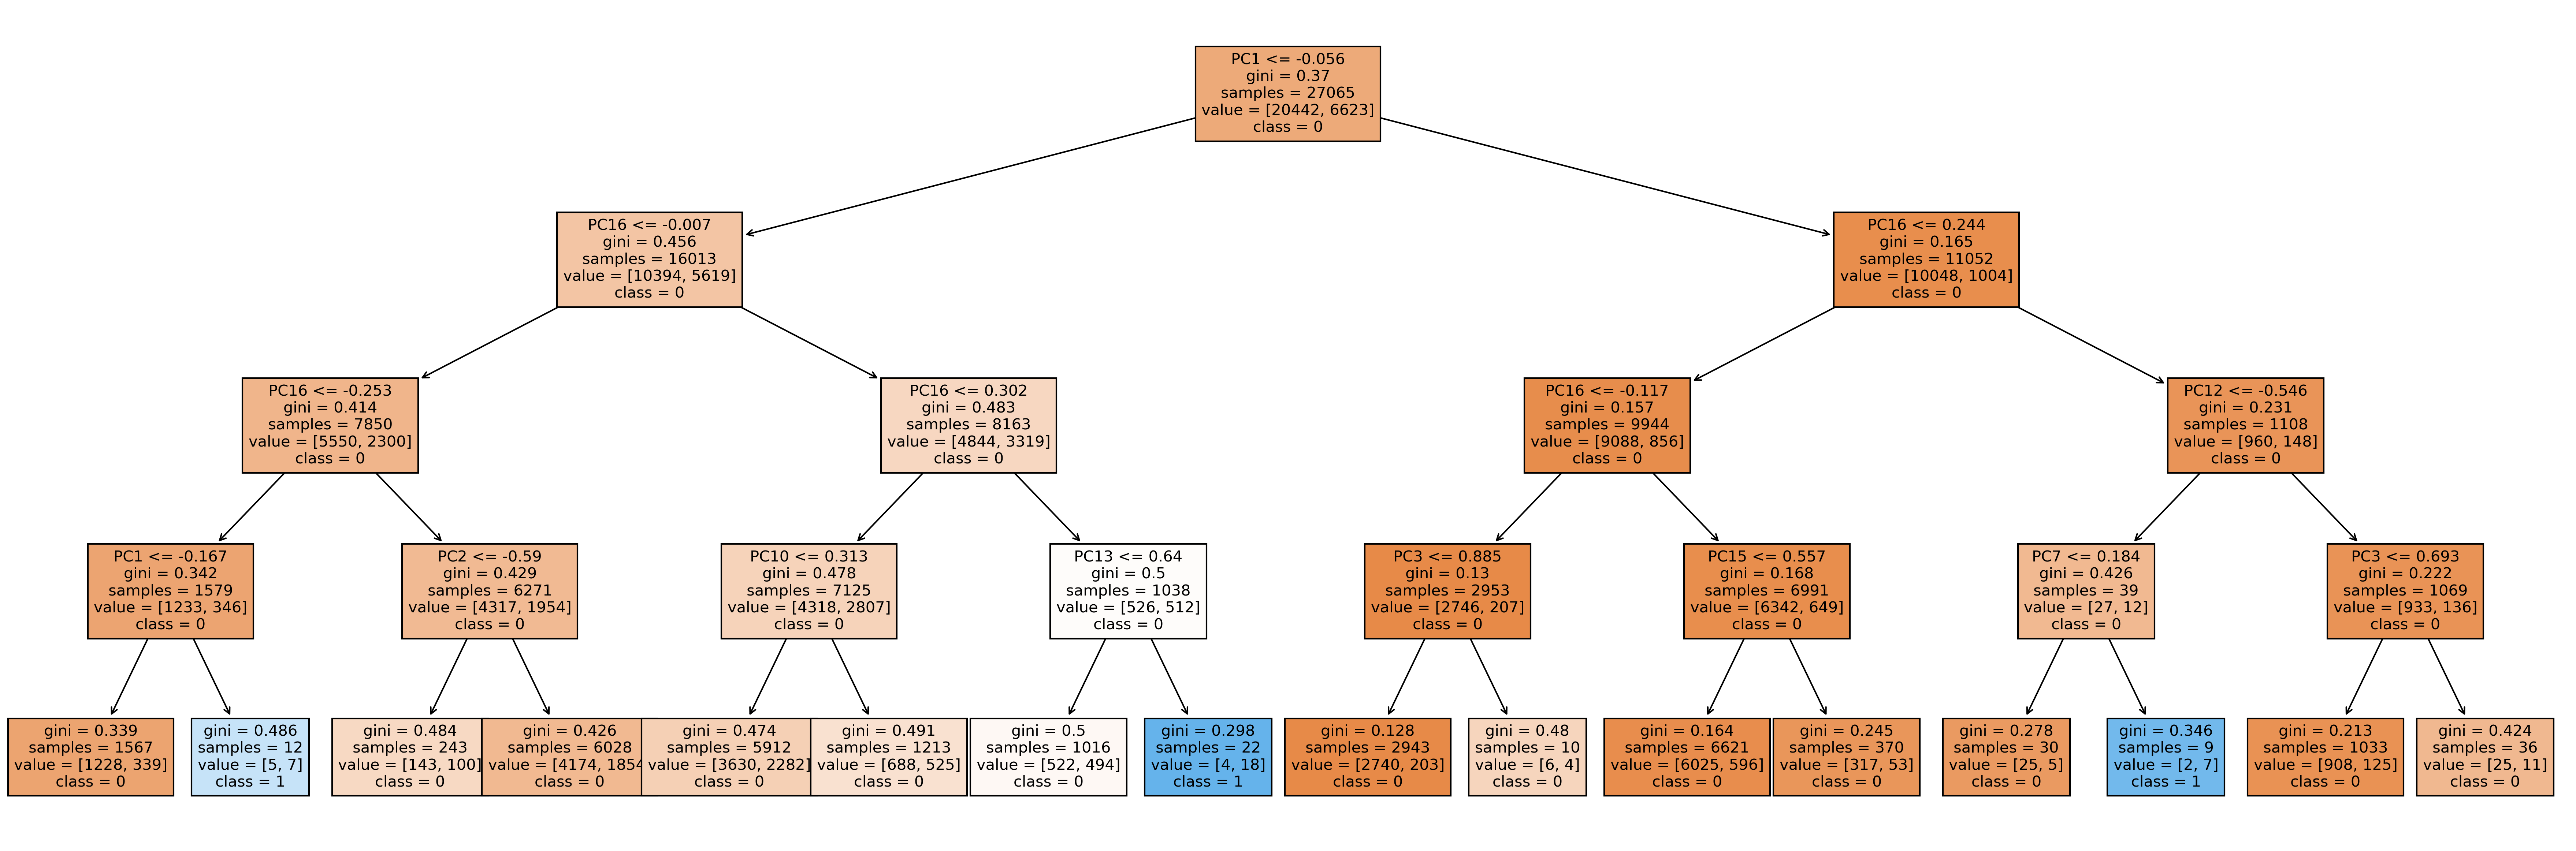

In [157]:
fn = pca_train.columns
cn = ['0', '1']

fig, ax = plt.subplots(figsize = (30, 10), dpi = 300)
tree.plot_tree(dt_pca, feature_names = fn, class_names = cn, filled = True, fontsize = 10)
plt.show()

In [158]:
print("Accuracy:",accuracy_score(y_test, dt_pca.predict(pca_test)))
print("precision score: ", precision_score(y_test,dt_pca.predict(pca_test)))
print("recall score: ", recall_score(y_test,dt_pca.predict(pca_test)))
print("f1-score: ", f1_score(y_test,dt_pca.predict(pca_test)))

Accuracy: 0.7603073740209841
precision score:  0.4473684210526316
recall score:  0.010506798516687269
f1-score:  0.020531400966183576


### Logistic Regression

#### Logistic Regression with Normalized Data

In [159]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
#LogisticRegression with normalized data
logit.fit(X_train_norm,y_train)

print('The intercept is', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X_train_norm.columns).sort_values('coefficient',ascending=False))
print()

#Result evaluation
#Only 38% accuracy 
print("Accuracy:",accuracy_score(y_test, logit.predict(X_test_norm)))
print("precision score: ", precision_score(y_test,logit.predict(X_test_norm)))
print("recall score: ", recall_score(y_test,logit.predict(X_test_norm)))
print("f1-score: ", f1_score(y_test,logit.predict(X_test_norm)))

The intercept is -2.400527177565318
                             coefficient
avg_volt_change_charging        2.580060
discharging_rate_lag3           2.266409
charge_cycle_time_below_12      1.686390
Total_Days_in_Service           0.997452
avg_time_discharging            0.869664
avg_volt_change_discharging     0.761047
chargecycles                    0.720924
cycle_time                      0.675783
dischargecycles                 0.657521
avg_time_charging_lag7          0.541272
avg_time_charging_lag12         0.424134
avg_time_charging_lag13         0.356975
number_times_restart            0.329092
avg_time_charging_lag14         0.294897
avg_time_charging               0.291377
avg_time_charging_lag3          0.243706
avg_time_charging_lag1          0.238279
avg_time_charging_lag5          0.223517
avg_time_discharging_lag4       0.147422
avg_time_charging_lag11         0.134009
discharging_rate_lag4           0.098638
avg_time_charging_lag9          0.098097
avg_time_discharging_

#### Logistic Regression with PCA

In [160]:
#LogisticRegression with PCA data
logit.fit(pca_train,y_train)

print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=pca_train.columns).sort_values('coefficient',ascending=False))
print()

#Result evaluation
#75% accuracy
print("Accuracy:",accuracy_score(y_test, logit.predict(pca_test)))
print("precision score: ", precision_score(y_test,logit.predict(pca_test)))
print("recall score: ", recall_score(y_test,logit.predict(pca_test)))
print("f1-score: ", f1_score(y_test,logit.predict(pca_test)))

intercept  -1.3221137168156982
      coefficient
PC16     1.331101
PC2      0.304818
PC12     0.053244
PC15     0.039175
PC9      0.033756
PC10     0.011102
PC3      0.008691
PC8      0.007722
PC6     -0.012931
PC5     -0.015477
PC11    -0.022534
PC13    -0.040000
PC14    -0.061958
PC7     -0.080834
PC4     -0.081949
PC1     -1.670785

Accuracy: 0.7616373577656274
precision score:  0.5242718446601942
recall score:  0.03337453646477132
f1-score:  0.06275421266705404


### Naive Bayes

#### Naive Bayes with Normalized Data

In [209]:
nb = GaussianNB()

#Naive Bayes with normalized data
nb.fit(X_train_norm,y_train)

## predict class membership
y_valid_pred = nb.predict(X_test_norm)
y_train_pred = nb.predict(X_train_norm)

## training
classificationSummary(y_train, nb.predict(X_train_norm))

#Result evaluation
print('\nAccuracy:', accuracy_score(y_test,y_valid_pred)) #76% accuracy 
print('Precision score:', 4671/(4671+8337))
print('Recall score:', 4671/(4671+1952))
print('F1 score:', 4671/(4671+(1952+8337)/2))

Confusion Matrix (Accuracy 0.6198)

       Prediction
Actual     0     1
     0 12105  8337
     1  1952  4671

Accuracy: 0.7608984779074922
Precision score: 0.3590867158671587
Recall score: 0.7052695153253813
F1 score: 0.4758799857368448


#### Naive Bayes with PCA 

In [210]:
#Naive Bayes with pca data
nb.fit(pca_train, y_train)

## predict class membership
y_valid_pred = nb.predict(pca_test)
y_train_pred = nb.predict(pca_train)

## training
classificationSummary(y_train, nb.predict(pca_train))

#Result evaluation
print('\nAccuracy:', accuracy_score(y_test,y_valid_pred)) #74% 
print('Precision score:', precision_score(y_test,y_valid_pred))
print('Recall score:', recall_score(y_test,y_valid_pred))
print('F1 score:', f1_score(y_test,y_valid_pred))

Confusion Matrix (Accuracy 0.7546)

       Prediction
Actual     0     1
     0 20054   388
     1  6253   370

Accuracy: 0.7591251662479681
Precision score: 0.4819277108433735
Recall score: 0.09888751545117429
F1 score: 0.1641025641025641


### Random Forrest

In [163]:
#with normalized data
X_train_norm, y_train = make_regression(n_features=52, n_informative=2,
                        random_state=0, shuffle=False)
regr_norm = RandomForestRegressor(max_depth = 2, random_state = 0)
regr_norm.fit(X_train_norm, y_train)

regr_norm

RandomForestRegressor(max_depth=2, random_state=0)

# Summary for Evaluation of Models 

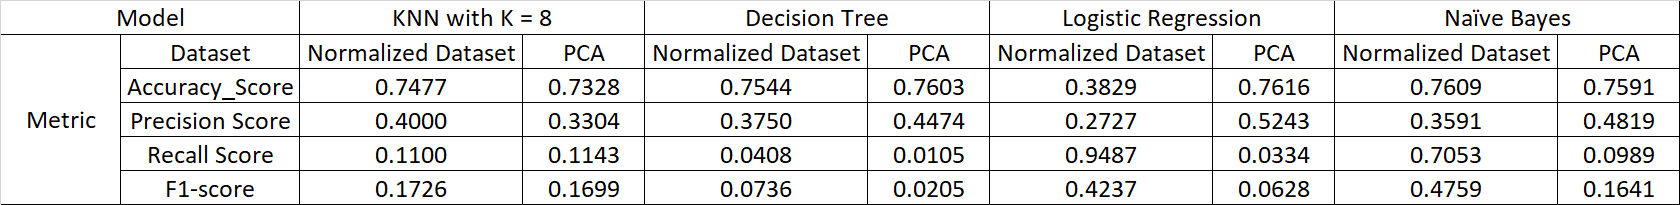

As a classification problem, we first looked at the accuracy scores where all our models returned values in the range from 0.73 to 0.77 except Logistic Regression model with normalized dataset, whose accuracy is only 0.38.  The Logistic Regression fit with the PCA's has highest accuracy 0.7616. 

Since none of the models were able to produce a significantly better accuracy score than the others, we then looked at the F1 scores to which we found our Logistic Regression model fit with our normalized dataset returning the largest value 0.42, but since it returned the lowest accuracy score we are not going to consider it as our choice. The Naive Bayes model fit with PCA's retuned strong precision and recall score compared to the other models. Finally, the Naive Bayes fit with PCA's returned the best F1 score of the remaining models still being considered. Therefore, the Naive Bayes fit with PCA's is our best fit model.

# Deploying the model

## Cleaning Test Dataset

In [211]:
#Data formatting - get dummies and drop null values.
df_test['charge_cycle_time_below_12'] = pd.get_dummies(df_train['charge_cycle_time_below_12'],prefix_sep='_',drop_first=True)
df_test['charge_cycle_time_below_12'] = df_test['charge_cycle_time_below_12'].astype('category')

#Dropping the null values and saving the modified DataFrame as 'test'
#Drop null values and save the modified DataFrame as 'test'
test = df_test.dropna(subset=['avg_time_discharging_lag14'], how='all')
test.columns
predictors = ['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time', 'LastRecord', 'Date Deployed']
outcome = 'fail_7' #target
#Defining X 

X = test[predictors]
#Subtracting the column 'Last Record' from the column 'Date Deployed' in order to get the total number of days in use.
fdate = X['Date Deployed'] = pd.to_datetime(X['Date Deployed'])
ldate = X['LastRecord'] = pd.to_datetime(X['LastRecord'])
X['Days_in_Service'] = (ldate - fdate)
X['Total_Days_in_Service'] = X['Days_in_Service'] / np.timedelta64(1, 'D')
#Dropping the columns 'Last Record', 'Date Deployed', and 'Days_in_Service' now that we have total number of days in use.
X_new = X.drop(['LastRecord', 'Date Deployed', 'Days_in_Service'], axis = 1)
X_new['charge_cycle_time_below_12'] = X_new['charge_cycle_time_below_12'].astype(float)
#Normalizing X
scale = MinMaxScaler()
X_norm = pd.DataFrame(scale.fit_transform(X_new), columns = X_new.columns)
#Specified that we wanted 95% of the variance to be retained, then turning it into an array and printing the total number of components.
pca = PCA(.95)
pca.fit(X_norm)
x_95 = pca.transform(X_norm)
print(pca.n_components_)
pca_X = pd.DataFrame(x_95, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 
                                          'PC15', 'PC16'])

print('Test dataset is cleaned. Deploy Naive Bayes Model with pca_X.')

pca_X.shape

16
Test dataset is cleaned. Deploy Naive Bayes Model with pca_X.


(3713, 16)

## Insert Cleaned Test Dataset into Naive Bayes Model to Predict 'fail_7' 

In [216]:
# predict 'fail_7'
nb = GaussianNB()

#Naive Bayes with PCA test data
nb.fit(pca_train, y_train)
y_pred = nb.predict(pca_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [217]:
y_pred.sum()

132

In [218]:
# add y_pred back to test dataset
test['fail_7'] = y_pred
test

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0        42979                   35.56                    4.31   
1        14911                   31.26                    4.76   
2        48386                   30.08                    5.07   
3        18822                   33.31                   32.79   
4        49810                    4.44                   30.03   
...        ...                     ...                     ...   
4493     14441                    4.67                   34.50   
4495     23329                   30.25                    4.75   
4497     12544                    4.94                    6.49   
4498     44502                    5.49                    4.65   
4499     16821                   42.41                    5.37   

      avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                       5.07                    4.60           -0.033333   
1                      27.40                   29.60           -0.076667   
2                       4.76                    4.74            0.013333   
3                       5.09                    4.96            0.000000   
4                       5.57                    5.02           -0.200000   
...                      ...                     ...                 ...   
4493                   38.59                    4.88            0.066667   
4495                   45.83                   27.42           -0.060000   
4497                    6.64                   32.07            0.596667   
4498                   10.27                    5.71           -0.003333   
4499                   30.48                    6.50            0.003333   

      charging_rate_lag7  avg_time_discharging_lag1  \
0               0.040000                      66.29   
1              -0.060000                      49.57   
2              -0.016667                      52.96   
3               0.003333                      49.26   
4              -0.030000                       4.16   
...                  ...                        ...   
4493            1.800000                       4.03   
4495            0.046667                      41.55   
4497           -0.133333                       3.49   
4498           -0.036667                       4.22   
4499            0.940000                      92.12   

      avg_time_discharging_lag2  avg_time_discharging_lag3  ...  \
0                          3.77                       4.07  ...   
1                          3.63                      44.06  ...   
2                          5.16                       4.05  ...   
3                         68.54                       5.83  ...   
4                         54.80                       4.52  ...   
...                         ...                        ...  ...   
4493                      45.25                      71.54  ...   
4495                       3.68                      76.77  ...   
4497                       5.67                       5.95  ...   
4498                       3.81                      21.46  ...   
4499                       5.05                      57.61  ...   

      avg_volt_change_charging  avg_volt_change_discharging  \
0                   346.301200                   345.379600   
1                   356.218261                   357.305652   
2                   368.532667                   366.844667   
3                   352.899375                   352.595000   
4                   363.912800                   365.208400   
...                        ...                          ...   
4493                354.090667                   350.930667   
4495                340.913889                   338.305556   
4497                337.693809                   335.125238   
4498                345.808000                   338.633500   
4499                339.618261                   339.396522   

      avg_time_charging avg_time_discharging  max_voltage_day  piececount  \
